In [34]:
from scipy import *  
from scipy.linalg import norm, pinv  
from matplotlib import pyplot as plt 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras . layers . recurrent import GRU
import keras
from keras.layers import Dropout
from xgboost import XGBRegressor as XGBR
#导入数据
test='C:/Users/WZZ/Desktop/Paper/Pre_data/Pre_data_nor.xlsx'
test = pd.read_excel(test, index_col=0, parse_dates=[0])
import numpy as np
import time
import argparse
import json
from sklearn import metrics
from math import sqrt, ceil
from keras . layers . recurrent import LSTM
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd
import warnings
#################################
index="Pc"
n_in=21
n_out =1
#################################
t_pc=test[index]
t_real=test[index]
t_real1=test[index]
t_real2=test[index]
X = t_real.values
X_tcr=t_real1.values
X_thq=t_real2.values
dataset=pd.DataFrame(X)
dataset_tcr=pd.DataFrame(X_tcr)
dataset_thq=pd.DataFrame(X_thq)
eader_row_index =0
index_col_name =0
col_to_predict =0
cols_to_drop =None
if index_col_name:
    dataset.set_index(index_col_name, inplace=True)    
if cols_to_drop:
    dataset.drop(cols_to_drop, axis =1, inplace = True)    
col_names = dataset.columns.values.tolist()
values = dataset.values   
# move the column to predict to be the first col: 把预测列调至第一列
col_to_predict_index = col_to_predict if type(col_to_predict) == int else col_names.index(col_to_predict)
output_col_name = col_names[col_to_predict_index]
if col_to_predict_index > 0:
    col_names = [col_names[col_to_predict_index]] + col_names[:col_to_predict_index] + col_names[col_to_predict_index+1:]
values = np.concatenate((values[:, col_to_predict_index].reshape((values.shape[0], 1)), values[:,:col_to_predict_index], values[:,col_to_predict_index+1:]), axis=1)
values = values.astype("float32")
col_names, values,n_features, output_col_name=col_names,values,values.shape[1], output_col_name
verbose = 2
dropnan = True
n_vars = 1 if type(values) is list else values.shape[1]
if col_names is None: col_names = ["var%d" % (j+1) for j in range(n_vars)]
df = DataFrame(values)
cols, names = list(), list()
# input sequence (t-n, ... t-1)
for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [("%s(t-%d)" % (col_names[j], i)) for j in range(n_vars)]
# forecast sequence (t, t+1, ... t+n)
for i in range(0, n_out):
    cols.append(df.shift(-i))         #这里循环结束后cols是个列表，每个列表都是一个shift过的矩阵
    if i == 0:
        names += [("%s(t)" % (col_names[j])) for j in range(n_vars)]
    else:
        names += [("%s(t+%d)" % (col_names[j], i)) for j in range(n_vars)]
# put it all together
agg = concat(cols, axis=1)    #将cols中的每一行元素一字排开，连接起来，vala t-n_in, valb t-n_in ... valta t, valb t... vala t+n_out-1, valb t+n_out-1
agg.columns = names
# drop rows with NaN values
if dropnan:
    agg.dropna(inplace=True)
if verbose:
    print("\nsupervised data shape:", agg.shape)
values=agg.values


supervised data shape: (252, 22)


In [36]:
train_X=values[:values.shape[0]-2*n_in,:n_in]
test_X=values[values.shape[0]-2*n_in:values.shape[0]-n_in,:n_in]
train_Y=values[:values.shape[0]-2*n_in,n_in:]
test_Y=values[values.shape[0]-2*n_in:values.shape[0]-n_in,n_in:]

In [37]:
class RBF:   
    def __init__(self, indim, numCenters, outdim):  
        self.indim = indim  
        self.outdim = outdim  
        self.numCenters = numCenters  
        self.centers = test[index].values
        self.beta = 8  
        self.W = random.random((self.numCenters, self.outdim))
 
           
    def _basisfunc(self, c, d):  
        assert len(d) == self.indim  
        return exp(-self.beta * norm(c-d)**2)  
       
    def _calcAct(self, X):  
        # calculate activations of RBFs  
        G = zeros((X.shape[0], self.numCenters), float)  
        for ci, c in enumerate(self.centers):  
            for xi, x in enumerate(X):  
                G[xi,ci] = self._basisfunc(c, x)  
        return G  
       
    def train(self, X, Y):  
        """ X: matrix of dimensions n x indim  
            y: column vector of dimension n x 1 """  
           
        # choose random center vectors from training set  
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]  
        self.centers = [X[i,:] for i in rnd_idx]  
   
        G = self._calcAct(X)  
           
        # calculate output weights (pseudoinverse)  
        self.W = dot(pinv(G), Y)  
           
    def test(self, X):  
        """ X: matrix of dimensions n x indim """  
           
        G = self._calcAct(X)  
        Y = dot(G, self.W)  
        return Y

In [38]:
rbf = RBF(21,273,1) 
rbf.train(train_X, train_Y)

C:\Users\WZZ\Desktop\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
C:\Users\WZZ\Desktop\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  del sys.path[0]
C:\Users\WZZ\Desktop\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead


In [39]:
pre0=rbf.test(train_X) 
pre1=[]
txt1=test_X[0]
for i in range(len(test_X)):
    txt1=txt1.reshape(i+1,n_in,1)
    list_xgt=rbf.test(txt1[i].reshape(1,n_in))
    pre1.append(list_xgt)
    list_xgtt=np.concatenate([txt1[i,1:n_in].reshape(n_in-1),list_xgt.reshape(1,)])  
    txt1=np.concatenate([txt1.reshape(i+1,n_in),list_xgtt.reshape((1,n_in))])
pre1=np.array(pre1).reshape(n_in)

C:\Users\WZZ\Desktop\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
C:\Users\WZZ\Desktop\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  del sys.path[0]
C:\Users\WZZ\Desktop\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead


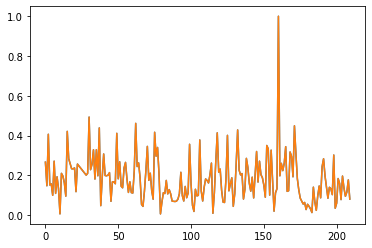

In [40]:
plt.plot(train_Y)
plt.plot(pre0)

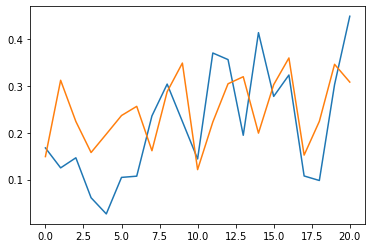

In [41]:
plt.plot(test_Y)
plt.plot(pre1)

In [42]:
pre0

array([[0.26626486],
       [0.14772919],
       [0.40660244],
       [0.15181588],
       [0.15752217],
       [0.09976382],
       [0.27137181],
       [0.10935538],
       [0.19274653],
       [0.13242678],
       [0.00638048],
       [0.21005027],
       [0.19648965],
       [0.16243224],
       [0.09548911],
       [0.42121682],
       [0.28353304],
       [0.2583952 ],
       [0.23325737],
       [0.23275396],
       [0.23738354],
       [0.11807153],
       [0.25678957],
       [0.2475242 ],
       [0.23825882],
       [0.22899345],
       [0.21972807],
       [0.21046269],
       [0.20119733],
       [0.21034235],
       [0.49308169],
       [0.22852117],
       [0.25554073],
       [0.32868439],
       [0.18137698],
       [0.32917216],
       [0.19791339],
       [0.43853775],
       [0.04772669],
       [0.18907414],
       [0.30754462],
       [0.19918786],
       [0.19777527],
       [0.20133911],
       [0.21386512],
       [0.06943362],
       [0.16744943],
       [0.167

In [43]:
pre1

array([0.14904451, 0.31207809, 0.22410725, 0.15775336, 0.1970464 ,
       0.23677306, 0.25637437, 0.16158886, 0.28765188, 0.3488294 ,
       0.12118032, 0.22292138, 0.30459257, 0.31967495, 0.19917898,
       0.30268223, 0.35976817, 0.1522304 , 0.22435795, 0.34618274,
       0.30821513])